In [1]:
pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display

In [3]:
Train_dir = 'train'
Test_dir = 'validation'

In [4]:
def createdataframe(dir):
    image_path = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_path.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_path,labels

In [5]:
train = pd.DataFrame()
train['image'],train['label']=createdataframe(Train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                         image     label
0            train\angry\0.jpg     angry
1            train\angry\1.jpg     angry
2           train\angry\10.jpg     angry
3        train\angry\10002.jpg     angry
4        train\angry\10016.jpg     angry
...                        ...       ...
28816  train\surprise\9969.jpg  surprise
28817  train\surprise\9985.jpg  surprise
28818  train\surprise\9990.jpg  surprise
28819  train\surprise\9992.jpg  surprise
28820  train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'],test['label']=createdataframe(Test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                             image     label
0          validation\angry\10.jpg     angry
1       validation\angry\10052.jpg     angry
2       validation\angry\10065.jpg     angry
3       validation\angry\10079.jpg     angry
4       validation\angry\10095.jpg     angry
...                            ...       ...
9057  validation\surprise\9806.jpg  surprise
9058  validation\surprise\9830.jpg  surprise
9059  validation\surprise\9853.jpg  surprise
9060  validation\surprise\9878.jpg  surprise
9061   validation\surprise\993.jpg  surprise

[9062 rows x 2 columns]


In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = Image.open(image).convert('L')  # Convert to grayscale
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/9062 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [16]:
# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0,4))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0,4))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0,4))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0,4))

# Flatten the output before feeding it into dense layers
model.add(Flatten())

# Add Dense (fully connected) layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))  # Optional: Dropout for regularization
# Add Dense (fully connected) layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Optional: Dropout for regularization

model.add(Dense(7, activation='softmax'))  # Output layer for binary classification

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x = x_train , y = y_train, epochs=30, batch_size=128, validation_data= (x_test,y_test))

Epoch 1/30


226/226 [==============================] - 238s 1s/step - loss: 0.4003 - accuracy: 0.2284 - val_loss: 0.3894 - val_accuracy: 0.2461
Epoch 2/30
226/226 [==============================] - 270s 1s/step - loss: 0.3827 - accuracy: 0.2669 - val_loss: 0.3543 - val_accuracy: 0.3471
Epoch 3/30
226/226 [==============================] - 261s 1s/step - loss: 0.3267 - accuracy: 0.4213 - val_loss: 0.3273 - val_accuracy: 0.4272
Epoch 4/30
226/226 [==============================] - 276s 1s/step - loss: 0.2918 - accuracy: 0.4999 - val_loss: 0.2848 - val_accuracy: 0.5211
Epoch 5/30
226/226 [==============================] - 259s 1s/step - loss: 0.2676 - accuracy: 0.5573 - val_loss: 0.2724 - val_accuracy: 0.5375
Epoch 6/30
226/226 [==============================] - 280s 1s/step - loss: 0.2499 - accuracy: 0.5932 - val_loss: 0.2523 - val_accuracy: 0.5844
Epoch 7/30
226/226 [==============================] - 261s 1s/step - loss: 0.2303 - accuracy: 0.6310 - val_loss: 0.2474 - val_accuracy: 0.59

284/284 [==============================] - 27s 96ms/step


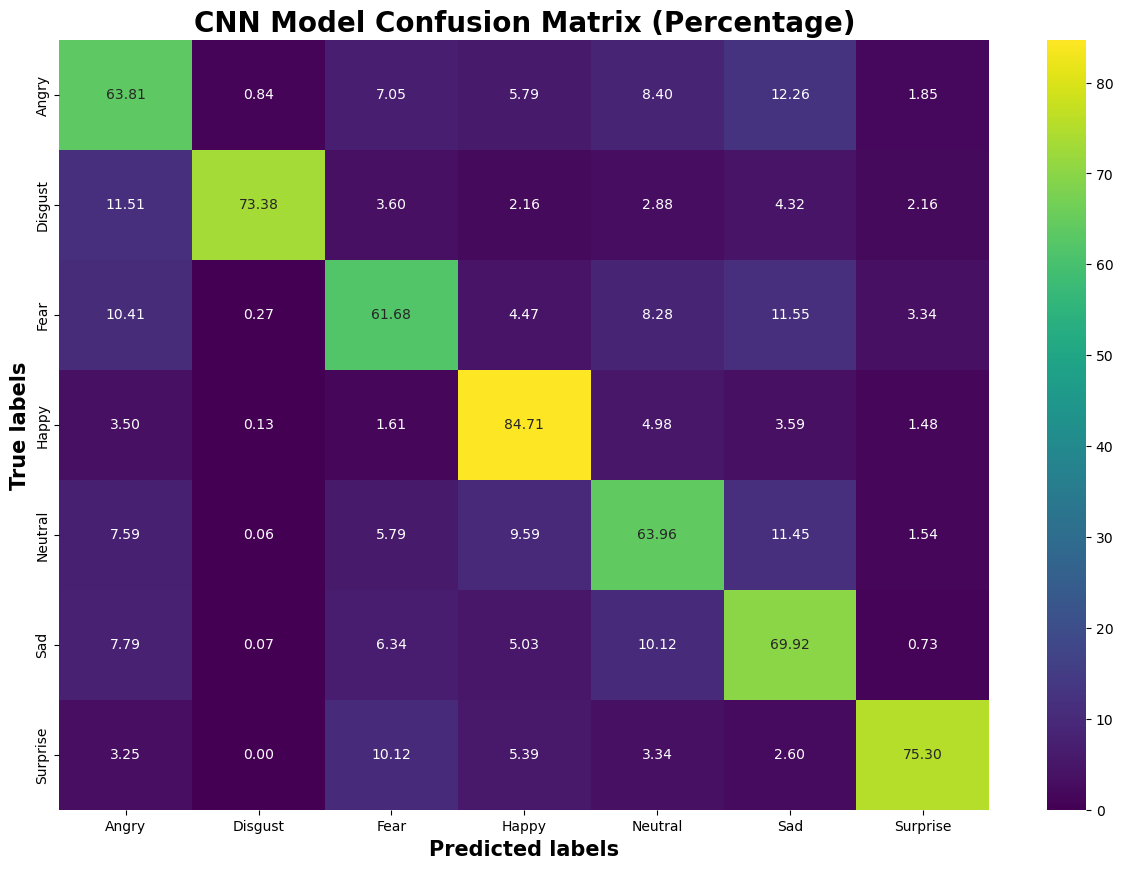

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'model' is your trained CNN model and 'x_test' and 'y_test' are your test data
# Replace 'x_test' and 'y_test' with actual test data variables if different

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# List of emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate the percentage confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix using seaborn with percentage values
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_percent, annot=True, fmt='.2f', ax=ax, xticklabels=emotion_labels, yticklabels=emotion_labels, cmap='viridis')

# Set labels and title
ax.set_xlabel('Predicted labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Model Confusion Matrix (Percentage)', fontsize=20, fontweight='bold')

# Display the plot
plt.show()


In [21]:
# Save the model in the current directory
model.save('emotionaldetector.h5')

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
